In [63]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt

In [120]:
@jit(nopython=True)
def dec2bin(x):
    b = []
    while(x > 0):
        d = float(x % 2)
        b.append(d)
        x = x // 2
    b.reverse()
    return b

@jit(nopython=True)
def multiply(A, x):
    y = np.zeros_like(x)
    for i in range(A.shape[0]):
        s = 0
        for j in range(A.shape[1]):
            s += A[i,j] * x[j]
        y[i] = s
    return y
    
@jit(nopython=True)
def dot(s1, s2):
    s = 0
    for i in range(len(s1)):
        s += s1[i] * s2[i]
    return s

@jit(nopython=True)
def brute_search(bqp):
    """
    Returns the spectrum of the binary quadratic model.
    """    
    N = bqp.shape[0]
    E = np.zeros(2**N)
    for i in range(2**N):
        x = dec2bin(i)
        x = np.array([-1. for j in range(N-len(x))] + [-1. if x[j]==0 else 1. for j in range(len(x))])
        E[i] = dot(x, multiply(bqp, x))
        print(x, E[i])
    
    return E

In [124]:
N = 4
# bqp = np.random.randint(0, 3, (N, N))
bqp = np.random.rand(N, N) * 2 - 1
bqp = np.triu(bqp, 1)
# bqp.round(3)

In [125]:
E = brute_search(bqp)
E = np.sort(E)

[-1. -1. -1. -1.] -0.14097818043108679
[-1. -1. -1.  1.] -0.8581428202722436
[-1. -1.  1. -1.] -1.4676235746146793
[-1. -1.  1.  1.] 0.5005032273256884
[-1.  1. -1. -1.] 2.2024428479793974
[-1.  1. -1.  1.] -2.167574546406401
[-1.  1.  1. -1.] 1.808049499511799
[-1.  1.  1.  1.] 0.12332354690752578
[ 1. -1. -1. -1.] 0.12332354690752578
[ 1. -1. -1.  1.] 1.808049499511799
[ 1. -1.  1. -1.] -2.167574546406401
[ 1. -1.  1.  1.] 2.2024428479793974
[ 1.  1. -1. -1.] 0.5005032273256884
[ 1.  1. -1.  1.] -1.4676235746146793
[ 1.  1.  1. -1.] -0.8581428202722436
[1. 1. 1. 1.] -0.14097818043108679


In [126]:
E[:10]

array([-2.16757455, -2.16757455, -1.46762357, -1.46762357, -0.85814282,
       -0.85814282, -0.14097818, -0.14097818,  0.12332355,  0.12332355])

(array([   2.,    6.,   14.,    8.,   30.,   50.,   50.,   44.,   66.,
         108.,  136.,  162.,  232.,  276.,  386.,  486.,  566.,  682.,
         804.,  908., 1048., 1260., 1390., 1490., 1636., 1700., 1816.,
        1820., 1818., 1792., 1612., 1514., 1516., 1300., 1154., 1014.,
         852.,  690.,  656.,  462.,  374.,  282.,  206.,  124.,   78.,
          52.,   38.,   34.,   14.,   10.]),
 array([-23.02662008, -22.18648066, -21.34634124, -20.50620183,
        -19.66606241, -18.82592299, -17.98578358, -17.14564416,
        -16.30550474, -15.46536533, -14.62522591, -13.78508649,
        -12.94494708, -12.10480766, -11.26466824, -10.42452883,
         -9.58438941,  -8.74424999,  -7.90411058,  -7.06397116,
         -6.22383174,  -5.38369233,  -4.54355291,  -3.70341349,
         -2.86327408,  -2.02313466,  -1.18299524,  -0.34285583,
          0.49728359,   1.33742301,   2.17756242,   3.01770184,
          3.85784126,   4.69798067,   5.53812009,   6.37825951,
          7.21839892,   

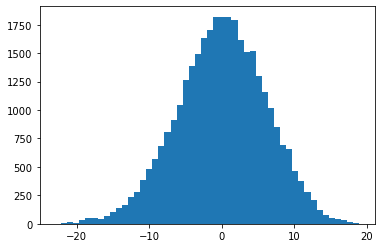

In [116]:
plt.close()
plt.hist(E, bins=50)

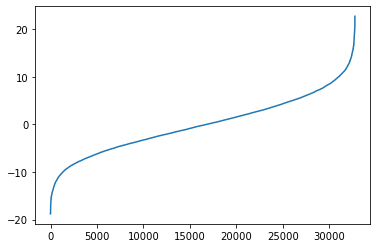

In [110]:
plt.close()
plt.plot(E)